In [2]:
import anndata
import numpy as np
import scipy as sp
import scanpy as sc
import scvelo as scv
import sys
import torch
import os
sys.path.append('../')
sys.path.append('/scratch/')
import velovae as vv

# Train a Mixture VAE

In [22]:
filename = '/scratch/blaauw_root/blaauw1/gyichen/output_vanillapp.h5ad'
adata = anndata.read_h5ad(filename)
adata.X.shape

(29994, 1000)

In [ ]:
Ngene = 1000
vv.preprocess(adata, Ngene, n_neighbors=100)

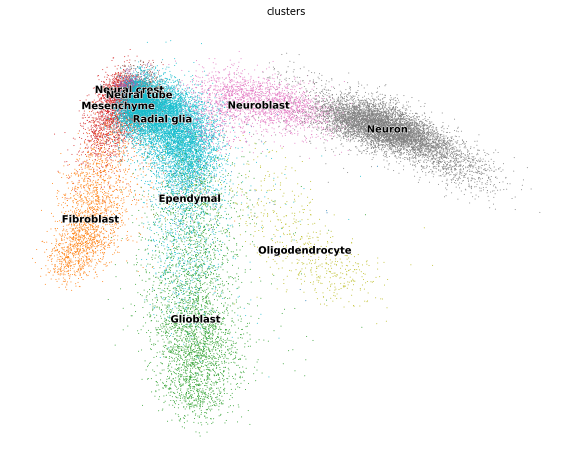

(29994, 50)

In [23]:
#scv.pl.scatter(adata, basis='tsne', color='clusters', save='../figures/Braindev/tsne.png')
#scv.tl.umap(adata)
scv.pl.scatter(adata, basis='pca', figsize=(10,8))
adata.obsm["X_pca"].shape

In [ ]:
adata.write_h5ad('/nfs/turbo/umms-welchjd/yichen/data/scRNA/braindev_pp.h5ad')

In [ ]:
def makeDir(file_path):
    directories = file_path.split('/')
    cur_path = ''
    for directory in directories:
        if(directory==''):
            continue
        cur_path += directory
        cur_path += '/'
        if(not (directory=='.' or directory == '..') ):
            if not os.path.exists(cur_path):
                os.mkdir(cur_path)

In [24]:
figure_path = '../figures/Braindev/BrVAE'
model_path = '../checkpoints/Braindev/BrVAE'
data_path = '../data/Braindev/BrVAE'
#data_path = '/scratch/blaauw_root/blaauw1/gyichen'
#adata.obs['clusters'] = adata.obs['leiden'].to_numpy()
#makeDir(figure_path)
#makeDir(model_path)

In [3]:
adata.obs['tprior'] = adata.obs.tprior - adata.obs.tprior.min()

In [29]:
tmax = adata.obs.vanillapp_time.max()
model = vv.VAE(adata, Cz=30, hidden_size=[(500,250), (500,250), (500,250)], Tmax=tmax, tprior='vanillapp_time', device='cpu', tkey='vanillapp', nbin=40, q_ot=0.01, fix_cell_type=True)
#model.encoder.load_state_dict(torch.load(f'../checkpoints/Pancreas/MixtureVAE/encoder.pt',map_location=model.device))
#model.decoder.load_state_dict(torch.load(f'../checkpoints/Pancreas/MixtureVAE/decoder.pt',map_location=model.device))

[:: Decoder ::] Using pretrained time with key 'vanillapp'


KeyboardInterrupt: 

In [ ]:
model.decoder.printWeight()
#adata.obs["t_init"] = model.decoder.t_init
#scv.pl.scatter(adata, color="t_init")

In [6]:
config_vae = {
    'num_epochs':800, 
    'test_epoch':50, 
    'save_epoch':50, 
    'learning_rate':1e-4, 
    'learning_rate_ode':1e-4, 
    'lambda':1e-3, 
    'neg_slope':0, 
    'reg_t':1.0, 
    'reg_y':100.0, 
    'yprior':True,
    'batch_size':1024,
    'Nstart_ot':200,
    'Nupdate_ot':25
}
gene_plot = ['Auts2', 'Dync1i1', 'Gm3764', 'Mapt', 'Nfib', 'Rbfox1', 'Satb2', 'Slc6a13', 'Srrm4', 'Tcf4']
#gene_plot = ['BMP2K', 'CSF1R', 'SENP7', 'OVCH1-AS1', 'ABHD2', 'SLC22A17', 'ITGA6', 'CLEC11A']
model.train(adata, config=config_vae, plot=True, gene_plot=gene_plot, figure_path=figure_path)

------------------------- Train a Mixture VAE -------------------------
***      Creating  Dataset      ***
***          Finished.          ***
***    Creating  optimizers     ***
***           Finished.         ***
***        Start training       ***
Total Number of Iterations Per Epoch: 30
temperature = 1.0
Epoch 1: Train Loss = 1906.04, Test Loss = 5.90, err_type = 0.000, rand index = 1.000 	 Total Time =   0 h :  1 m : 50 s
                 Ependymal  Fibroblast  Glioblast  Mesenchyme  Neural crest  Neural tube  Neuroblast     Neuron  Oligodendrocyte  Radial glia
Ependymal        0.000e+00       0.134  8.622e-02       0.011         0.000        0.002       0.280  1.574e-01            0.000        0.328
Fibroblast       0.000e+00       0.050  0.000e+00       0.430         0.104        0.127       0.005  0.000e+00            0.000        0.285
Glioblast        0.000e+00       0.096  7.811e-03       0.091         0.005        0.045       0.086  0.000e+00            0.000        0.668


temperature = 0.7985162187593771
Epoch 250: Train Loss = -210.07, Test Loss = 1.71, err_type = 0.000, rand index = 1.000 	 Total Time =   0 h : 36 m :  2 s
                 Ependymal  Fibroblast  Glioblast  Mesenchyme  Neural crest  Neural tube  Neuroblast  Neuron  Oligodendrocyte  Radial glia
Ependymal        0.000e+00       0.116      0.024   1.632e-03         0.000    0.000e+00       0.211   0.001        0.000e+00        0.646
Fibroblast       0.000e+00       0.003      0.000   2.634e-01         0.057    1.250e-01       0.000   0.000        0.000e+00        0.551
Glioblast        0.000e+00       0.132      0.020   3.363e-03         0.000    0.000e+00       0.189   0.000        0.000e+00        0.653
Mesenchyme       0.000e+00       0.000      0.000   5.312e-02         0.341    5.856e-01       0.000   0.000        0.000e+00        0.021
Neural crest     0.000e+00       0.000      0.000   0.000e+00         0.856    1.445e-01       0.000   0.000        0.000e+00        0.000
Neural tub

temperature = 0.6376281516217733
Epoch 500: Train Loss = -272.20, Test Loss = 1.56, err_type = 0.000, rand index = 1.000 	 Total Time =   1 h : 15 m : 52 s
                 Ependymal  Fibroblast  Glioblast  Mesenchyme  Neural crest  Neural tube  Neuroblast  Neuron  Oligodendrocyte  Radial glia
Ependymal        0.000e+00   1.260e-01      0.015       0.074         0.000    0.000e+00       0.112   0.000            0.000        0.673
Fibroblast       0.000e+00   3.034e-02      0.012       0.498         0.000    0.000e+00       0.003   0.001            0.000        0.456
Glioblast        0.000e+00   1.583e-01      0.009       0.167         0.000    0.000e+00       0.062   0.000            0.000        0.605
Mesenchyme       0.000e+00   0.000e+00      0.000       0.012         0.082    3.441e-01       0.000   0.000            0.000        0.561
Neural crest     0.000e+00   0.000e+00      0.000       0.000         0.220    7.204e-01       0.000   0.000            0.000        0.059
Neural tub

temperature = 0.5091564206075492
Epoch 750: Train Loss = -403.69, Test Loss = 1.54, err_type = 0.000, rand index = 1.000 	 Total Time =   2 h :  1 m :  7 s
                 Ependymal  Fibroblast  Glioblast  Mesenchyme  Neural crest  Neural tube  Neuroblast     Neuron  Oligodendrocyte  Radial glia
Ependymal        0.000e+00   3.339e-02      0.007       0.291     1.191e-03    0.000e+00       0.219  1.051e-03            0.000        0.448
Fibroblast       0.000e+00   1.087e-02      0.010       0.347     3.508e-03    0.000e+00       0.059  0.000e+00            0.000        0.569
Glioblast        0.000e+00   6.016e-02      0.008       0.166     0.000e+00    0.000e+00       0.245  0.000e+00            0.000        0.520
Mesenchyme       0.000e+00   0.000e+00      0.000       0.010     4.274e-02    2.713e-01       0.000  0.000e+00            0.000        0.676
Neural crest     0.000e+00   0.000e+00      0.000       0.008     4.729e-02    3.056e-01       0.000  0.000e+00            0.000      

In [ ]:
model.saveModel(model_path, 'encoder_brvae','decoder_brvae')
model.saveAnnData(adata, 'brvae', data_path, file_name='output_braindev.h5ad')

# (Optional) Run scVelo

In [6]:
adata = anndata.read_h5ad('../data/Braindev/Rho/output_vanillapp.h5ad')

In [7]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/40 cores)


  0%|          | 0/778 [00:00<?, ?gene/s]

    finished (3:17:04) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [8]:
adata.write_h5ad('../data/Braindev/Rho/output_vanillapp.h5ad')

In [ ]:
adata.uns['mvae_w'] = np.array([[0,0,0,0,0,0,0,1],
                                [0,0,0,0,0,0,0,1],
                                [0,0,0,0,0,0,0,1],
                                [0,0,0,1,0,0,0,0],
                                [0,0,0,0,0,0,0,1],
                                [0,0,0,1,0,0,0,0],
                                [0,0,0,1,0,0,0,0],
                                [0,0,0,0,0,1,0,0]])

In [ ]:
figure_path = '../figures/Pancreas/Post'
vv.postAnalysis(adata, methods=['mix','scvelo'], keys=['mvae','fit'], genes=['Cpe', 'Ppp3ca', 'Smoc1', 'Gng12'], plot_type=['time','signal'], grid_size=(2,2), save_path=figure_path)

In [ ]:
X_umap = adata.obsm['X_uma']
vv.plotVelocity(X_umap, vx, vy, path='figures', figname='genes')

In [ ]:
import wot
import pandas as pd

In [ ]:
adata.obs.keys()

In [ ]:
adata.obs["day"] = adata.obs.tprior
ot_model = wot.ot.OTModel(adata,epsilon = 0.05, lambda1 = 1,lambda2 = 50) 

In [ ]:
#adata.obs.day.min()
tmap_annotated = ot_model.compute_transport_map(8, 9)
print(tmap_annotated)

In [ ]:
cell_types = np.unique(adata.obs.clusters)
P = np.zeros((len(cell_types),len(cell_types)))
for i, x in enumerate(cell_types):
    for j, y in enumerate(cell_types):
        mask1 = (adata.obs.clusters[adata.obs.day==8]==x)
        mask2 = (adata.obs.clusters[adata.obs.day==9]==y)
        if(np.any(mask1) and np.any(mask2)):
            P[i,j] = tmap_annotated.X[mask1][:, mask2].sum()
#Normalize to transition probability
for i in range(len(cell_types)):
    if(P[i].sum()==0):
        P[i,i] = 1.0
    P[i] = P[i]/P[i].sum()

P_dic = {}
for j,y in enumerate(cell_types):
    P_dic[y] = P[:,j]
w_df = pd.DataFrame(P_dic, index=pd.Index(cell_types))
with pd.option_context('display.max_rows', None, 
                           'display.max_columns', None, 
                           'display.precision', 2,
                           'display.chop_threshold',1e-3,
                           'display.width', 200):

    print(w_df)